# Project: Wrangling and Analyze Data

## Import Libraries 
In the cell below, we import **all** the libraries required for this project.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [73]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv') # Direct download of the WeRateDogs Twitter archive data, and store inside a pandas dataframe

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [74]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_response = requests.get(url, allow_redirects = True)

with open('image-predictions.tsv', mode='wb') as file:
  file.write(image_predictions_response.content)

image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [75]:
# Since my Twitter Developer account approval is pending, 
# I will be reading the data directly from the tweet-json.json file
tweet_data = pd.read_json('tweet-json.json', lines=True)
tweet_data = tweet_data.filter(['id', 'favorite_count', 'retweet_count'])
tweet_data = tweet_data.rename(columns={"id":"tweet_id"})
tweet_data.to_csv('tweet_data.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### i. Accessing the twitter archive data

In [76]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [77]:
# # Number of retweeted tweets
# len(twitter_archive_df[twitter_archive_df['retweeted_status_id'].notnull()])

In [78]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1119,731285275100512256,NaN,NaN,2016-05-14 00:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731285275...,12,10,Solomon,None,None,None,None
351,831322785565769729,NaN,NaN,2017-02-14 02:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831322785...,12,10,Pete,doggo,None,None,None
1709,680609293079592961,NaN,NaN,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,None,None,None,None
1526,690374419777196032,NaN,NaN,2016-01-22 03:24:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phred. He's an Albanian Flepperkush. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690374419...,11,10,Phred,None,None,None,None
1432,697482927769255936,NaN,NaN,2016-02-10 18:11:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Blipson. He's a Doowap Hufflepuff. That U...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,None,None,None,None
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,None,None,None,None
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
2110,670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paull. He just stubbed his toe. 10/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,None,None,None,pupper,None


In [79]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [80]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [81]:
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [82]:
# Showing rows with numerators less than 10
twitter_archive_df[twitter_archive_df.rating_numerator < 10].count()[0]

440

In [83]:
# Showing rows with denominators equals 0
twitter_archive_df[(twitter_archive_df.rating_denominator == 0) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [84]:
# Showing rows with denominators greater or less than 10
print(len(twitter_archive_df[(twitter_archive_df.rating_denominator < 10) | (twitter_archive_df.rating_denominator > 10)]))
twitter_archive_df[(twitter_archive_df.rating_denominator < 10) | (twitter_archive_df.rating_denominator > 10)]

23


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


### ii. Accessing the tweet image prediction 

In [85]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [86]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [87]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061016,False,grand_piano,0.055086,False
700,684800227459624960,https://pbs.twimg.com/media/CYDmK7ZVAAI_ylL.jpg,1,miniature_schnauzer,0.294457,True,Norfolk_terrier,0.161885,True,West_Highland_white_terrier,0.120992,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
1518,787397959788929025,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1,Chihuahua,0.900483,True,toy_terrier,0.021084,True,miniature_pinscher,0.019484,True
926,702598099714314240,https://pbs.twimg.com/media/CcAhPevW8AAoknv.jpg,1,kelpie,0.219179,True,badger,0.133584,False,Siamese_cat,0.074440,False
341,672254177670729728,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,True,French_bulldog,0.016850,True,Norwegian_elkhound,0.001618,True
1763,826240494070030336,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French_bulldog,0.903048,True,pug,0.096242,True,Boston_bull,0.000234,True


In [88]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [89]:
# I'm merely interested as to why this image was classified as a paper towel.
image_predictions_df.loc[2071, 'jpg_url']

'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg'

In [90]:
from IPython.display import Image
Image(url="https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg")

### iii. Getting the tweet data from twitter API

In [91]:
tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [92]:
tweet_data.sample(10)

,tweet_id,favorite_count,retweet_count
2236,668113020489474048,709,265
2063,671151324042559489,714,166
2315,666644823164719104,238,88
1939,673715861853720576,3815,2303
1098,735648611367784448,4397,1237
1067,740365076218183684,2727,495
619,796125600683540480,5511,2079
1926,674045139690631169,1520,710
135,866334964761202691,54720,15546
639,793241302385262592,11780,3812


In [93]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. Inaccurate tweet id (integer instead of string) and Invalid timestamp data type (String not DateTime).

2. The Twitter enhanced archive data contains 181 retweets.

3. There are 78 reply to tweet in the Twitter enhanced archive data.

4. There are 440 Numerators less than 10.

5. Incorrect dog names like None, a, an, & the.

6. Predicted photo data are not all complete (2075 instead of 2356).

7. Instead of using spaces, the picture names uses underscore in p1, p2 and p3 column.

8. Inconsistent title case for p name.

### Tidiness issues
1. There are four columns of data for the dog stage

2. Despite being split into three different dataframes, all the data are related.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [94]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive_df.copy()
clean_tweet_data = tweet_data.copy()
clean_image_predictions = image_predictions_df.copy()

In [95]:
clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [96]:
clean_tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [97]:
clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [98]:
# Create a new dog_stage column by extracting dog stage from the text column.
clean_twitter_archive['dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')

## Tidiness Issues

### **Issue #1:** There are four columns of data for the dog stage.

#### **Define:** The dog stage should be extracted from the text and merged into one colum (dog_stage), finally the four other colums should be dropped.

#### Code

In [99]:
# Create a new dog_stage column by extracting dog stage from the text column.
clean_twitter_archive['dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [100]:
clean_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,NaN
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,NaN
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,NaN
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,NaN
2073,670995969505435648,NaN,NaN,2015-11-29 16:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670995969...,12,10,None,NaN
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,NaN
491,813800681631023104,NaN,NaN,2016-12-27 17:36:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,NaN
2210,668620235289837568,NaN,NaN,2015-11-23 02:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kallie. There was a tornado in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668620235...,10,10,Kallie,NaN
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,NaN
2020,672095186491711488,NaN,NaN,2015-12-02 16:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672095186...,9,10,Tuco,NaN


### **Issue #2:** Despite being split into three different dataframes, all the data are related.

#### **Define:** All dataframes should be combined and joined together using the tweet id.

#### Code

In [101]:
# Combining the Enhanced Twitter Archive data that has been cleaned with the Tweet Data from the Twitter API
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet_data, on='tweet_id', how='inner')

# Taking the resulting merged archive and merging it with the Tweet Image Predictions
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_image_predictions, on='tweet_id', how='inner')

#### Test

In [102]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   337 n

## Quality Issues

### **Issue #1:** Inaccurate tweet id (integer instead of string) and Invalid timestamp data type (String not DateTime).

#### **Define:** Convert the tweet id column's data type from an integer to a string using astype.

#### Code

In [103]:
# Converting the tweet_id from integer into string
clean_twitter_archive.tweet_id = clean_twitter_archive.tweet_id.astype('str')

#### Test

In [104]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   337 n

#### **Define:** Convert the timestamp column's data type from an string to a DateTime.

#### Code

In [105]:
# Converting the tweet_id from integer into string
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)

#### Test

In [106]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### **Issue #2:** The Twitter enhanced archive data contains 181 retweets.

#### **Define:** Remove all associated columns and the rows that indicate retweets.

#### Code

In [107]:
# Only keep original tweets that do not have a retweet statud id.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

In [108]:
# Drop all retweet related columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [109]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              326 non-null    object             
 11  favorite_count         1994 non-null   int64            

### **Issue #3:** There are 78 reply to tweet in the Twitter enhanced archive data.

#### **Define:** Remove all associated columns and the rows that indicate tweet replies.

#### Code

In [110]:
# Only keep original tweets that do not have a retweet statud id.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1971 non-null   object             
 1   in_reply_to_status_id  0 non-null      float64            
 2   in_reply_to_user_id    0 non-null      float64            
 3   timestamp              1971 non-null   datetime64[ns, UTC]
 4   source                 1971 non-null   object             
 5   text                   1971 non-null   object             
 6   expanded_urls          1971 non-null   object             
 7   rating_numerator       1971 non-null   int64              
 8   rating_denominator     1971 non-null   int64              
 9   name                   1971 non-null   object             
 10  dog_stage              322 non-null    object             
 11  favorite_count         1971 non-null   int64            

In [111]:
# Drop all retweet related columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [112]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           322 non-null    object             
 9   favorite_count      1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### **Issue #4:** There are 440 Numerators less than 10.

#### **Define:** Remove all occurrence of rating_denominator column less than 10.

#### Code

In [113]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['rating_denominator'] >= 10]

#### Test

In [138]:
clean_twitter_archive[clean_twitter_archive['rating_denominator'] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### **Issue #5:** Incorrect dog names like None, a, an, & the.

#### **Define:** Extract the correct names from the text column and change any invalid names (None or names beginning with lowercase letters) to NaN. (immediately following the word "named").

#### Code

In [115]:
clean_twitter_archive.name = clean_twitter_archive.name.replace(regex=['^[a-z]+', 'None'], value= np.nan)

In [116]:
# a function to extract names from text columns, returning NaN if there are no words that can be called names.
def name_extractor(text):
  list_of_text = text.split()
  for word in list_of_text:
    if word.lower() == 'named':
      name_index = list_of_text.index(word) + 1 # word after 'named
      return list_of_text[name_index]
    else:
      pass
  return np.nan

In [117]:
#np.where(condition, what to do if condition is true, what to do if condition is false)
clean_twitter_archive.name = np.where(clean_twitter_archive.name.isnull(), clean_twitter_archive.text.apply(name_extractor), clean_twitter_archive.name)

#### Test

In [118]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1969 non-null   object             
 1   timestamp           1969 non-null   datetime64[ns, UTC]
 2   source              1969 non-null   object             
 3   text                1969 non-null   object             
 4   expanded_urls       1969 non-null   object             
 5   rating_numerator    1969 non-null   int64              
 6   rating_denominator  1969 non-null   int64              
 7   name                1371 non-null   object             
 8   dog_stage           322 non-null    object             
 9   favorite_count      1969 non-null   int64              
 10  retweet_count       1969 non-null   int64              
 11  jpg_url             1969 non-null   object             
 12  img_num             1969 non-null 

### **Issue #6:** Predicted photo data are not all complete (2075 instead of 2356).

#### **Define:** Remove the row with missing photo data.

#### Code

In [119]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.jpg_url.notnull()]

#### Test

In [120]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1969 non-null   object             
 1   timestamp           1969 non-null   datetime64[ns, UTC]
 2   source              1969 non-null   object             
 3   text                1969 non-null   object             
 4   expanded_urls       1969 non-null   object             
 5   rating_numerator    1969 non-null   int64              
 6   rating_denominator  1969 non-null   int64              
 7   name                1371 non-null   object             
 8   dog_stage           322 non-null    object             
 9   favorite_count      1969 non-null   int64              
 10  retweet_count       1969 non-null   int64              
 11  jpg_url             1969 non-null   object             
 12  img_num             1969 non-null 

### **Issue #7:** Instead of using spaces, the picture names uses underscore in p1, p2 and p3 column.

#### **Define:** Replace the underscore with space.

#### Code

In [121]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.replace('_', ' ')
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.replace('_', ' ')
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.replace('_', ' ')

#### Test

In [122]:
clean_twitter_archive.p1.sample(10)

292           hippopotamus
37                Pembroke
629     long-horned beetle
1093      Blenheim spaniel
519       Lakeland terrier
207     Labrador retriever
1751            chimpanzee
268               Pembroke
762                   chow
944          Border collie
Name: p1, dtype: object

In [123]:
clean_twitter_archive.p2.sample(10)

1071               Samoyed
330              Chihuahua
7               Eskimo dog
1027                carton
1098                   hog
1341        cocker spaniel
1270                collie
910            feather boa
926     Labrador retriever
1235          bull mastiff
Name: p2, dtype: object

In [124]:
clean_twitter_archive.p3.sample(10)

1546    miniature pinscher
1818           wood rabbit
451                   file
1156           toy terrier
1857                bolete
1672                kuvasz
546       golden retriever
1614           Maltese dog
406         French bulldog
1400       German shepherd
Name: p3, dtype: object

### **Issue #8:** Inconsistent title case for p name.

#### **Define:** Replace the  names that starts with lowercase using an uppercase.

#### Code

In [125]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

#### Test

In [126]:
clean_twitter_archive.p1.sample(10)

1539                           Hamster
1389                               Hog
970                            Samoyed
898                         Guinea Pig
358                    Standard Poodle
664                  Italian Greyhound
1098                         Wild Boar
300     American Staffordshire Terrier
1678                      Newfoundland
2017          Chesapeake Bay Retriever
Name: p1, dtype: object

In [127]:
clean_twitter_archive.p2.sample(10)

674     Chesapeake Bay Retriever
604                  Toy Terrier
1574                      Beagle
1457                        Mask
799                        Teddy
1633                    Shih-Tzu
927               Siberian Husky
1461              French Bulldog
1725                   Cockroach
60            Labrador Retriever
Name: p2, dtype: object

In [128]:
clean_twitter_archive.p3.sample(10)

1624                 Screw
1150        Cocker Spaniel
517            Boston Bull
803       Blenheim Spaniel
341           Irish Setter
1679                Borzoi
1975    Labrador Retriever
647          Saint Bernard
432            Toy Terrier
1310     Italian Greyhound
Name: p3, dtype: object

In [129]:
(clean_twitter_archive.p1.str.istitle()).value_counts()

True    1969
Name: p1, dtype: int64

In [130]:
(clean_twitter_archive.p2.str.istitle()).value_counts()

True    1969
Name: p2, dtype: int64

In [131]:
(clean_twitter_archive.p3.str.istitle()).value_counts()

True    1969
Name: p3, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [139]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
The data set is analysed in this section, along with the related visuals that help us reach insightful conclusions.

### Insights:
1. Displaying the general quantity of tweets over time allowing us to spot any noticeable changes in the volume of tweets.

2. The popularity of different dog stages in percentage.

3. Relationship between the number of retweets and the number of favorites.

### Visualization
1. Number of tweet as date changes

In [133]:
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = clean_twitter_archive.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

/var/folders/8f/70804ky96tl5nvmk8nyl0f4w0000gn/T/ipykernel_29852/3297307203.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    1969
dtype: int64

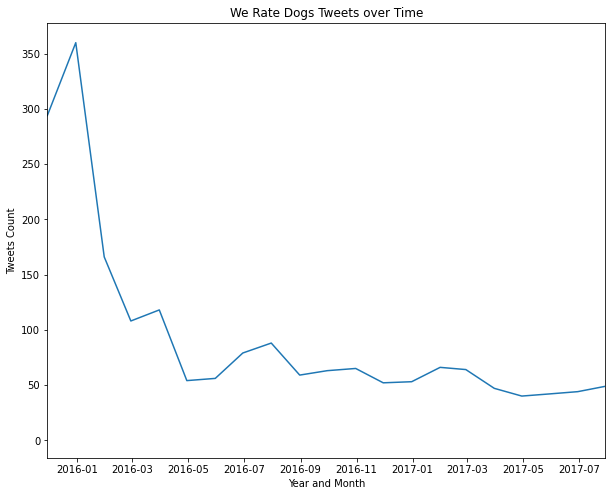

In [134]:
plt.figure(figsize=(10, 8));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

Over time, the number of tweets drastically reduced, peaking in January and March of 2016 before steadily declining thereafter.

2. Percentage of dog stages

In [135]:
dog_stage_df = clean_twitter_archive.dog_stage.value_counts()
dog_stage_df

pupper     220
doggo       71
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.1836868322288165, 1.418136185775833, -1.333841557178941, 1.205571582077769)

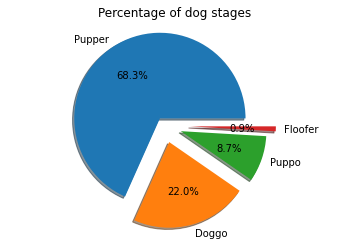

In [136]:
# Creating a pie chart
plt.pie(dog_stage_df,
        labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'], 
        autopct='%1.1f%%',
        shadow=True,
        explode=(0.1, 0.2, 0.2, 0.3)
        )

plt.title('Percentage of dog stages')
plt.axis('equal')

3. Relationship between the number of retweets and the number of favorites


Text(0, 0.5, 'Number of Favorites')

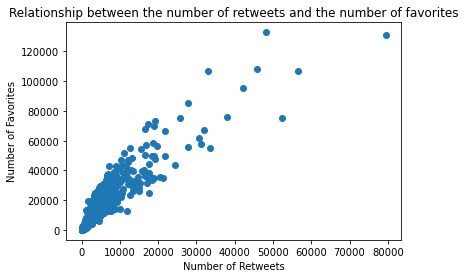

In [137]:
plt.scatter(clean_twitter_archive.retweet_count, clean_twitter_archive.favorite_count)
plt.title('Relationship between the number of retweets and the number of favorites')
plt.xlabel('Number of Retweets')
plt.ylabel ('Number of Favorites')